In [1]:
from xcube_multistore.multistore import MultiSourceDataStore

In [2]:
msds = MultiSourceDataStore.from_file("config.yml", visualize=True)

<frozen abc>:106: FutureWarning: xarray subclass VectorDataCube should explicitly define __slots__


/home/konstantin/micromamba/envs/ms-datastore/lib/python3.12/site-packages/xcube_cci/cciodp.py:2043: CciOdpWarning: Variable "crs" has no fill value, cannot set one. For parts where no data is available you will see random values. This is usually the case when data is missing for a time step.
  warnings.warn(f'Variable "{fixed_key}" has no fill value, '


In [6]:
ds = msds.stores.storage.open_data("biomass_xu.nc", chunks=dict(time=1))
ds

<xarray.Dataset> Size: 518MB
Dimensions:         (time: 20, lat: 1800, lon: 3600)
Coordinates:
  * time            (time) datetime64[ns] 160B 2000-01-01 ... 2019-01-01
    spatial_ref     int64 8B ...
  * lon             (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.9
  * lat             (lat) float64 14kB 89.95 89.85 89.75 ... -89.85 -89.95
Data variables:
    carbon_density  (time, lat, lon) float32 518MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes:
    source:                     https://zenodo.org/records/4161694/files/test...
    geospatial_lon_units:       degrees_east
    geospatial_lon_min:         -180
    geospatial_lon_max:         179.90000000000003
    geospatial_lon_resolution:  0.1
    geospatial_lat_units:       degrees_north
    geospatial_lat_min:         -89.90000000000003
    geospatial_lat_max:         90
    geospatial_lat_resolution:  0.1
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-180 -89.90000000000003, -180 90, 17...
    date_modified:              2025-02-20T17:05:32.037351

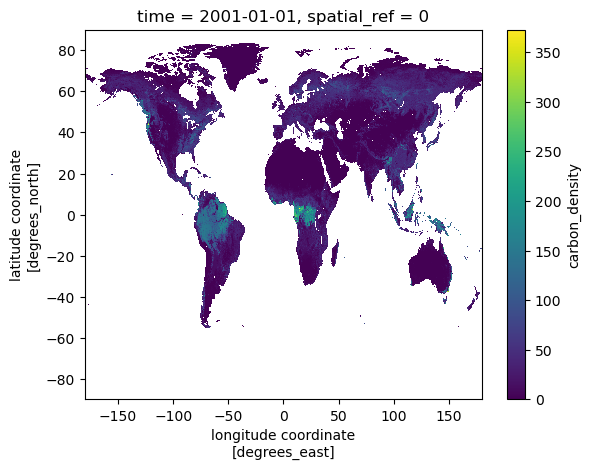

In [11]:
ds.carbon_density.isel(time=1).plot()

In [12]:
ds = msds.stores.storage.open_data("esa_cci_biomass.nc", chunks=dict(time=1))
ds

<xarray.Dataset> Size: 415MB
Dimensions:    (time: 8, lat: 1800, lon: 3600, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 64B 2010-01-01 2015-01-01 ... 2021-01-01
    time_bnds  (time, bnds) datetime64[ns] 128B dask.array<chunksize=(1, 2), meta=np.ndarray>
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * lat        (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
    lon_bnds   (lon, bnds) float64 58kB dask.array<chunksize=(3600, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 29kB dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    agb        (time, lat, lon) float32 207MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    agb_sd     (time, lat, lon) float32 207MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    crs        int64 8B ...
Attributes: (12/19)
    Conventions:                CF-1.7
    title:                      esacci.BIOMASS.yr.L4.AGB.multi-sensor.multi-p...
    date_created:               2025-02-20T17:06:24.364953
    processing_level:           L4
    time_coverage_start:        2010-01-01T00:00:00
    time_coverage_end:          2021-01-01T00:00:00
    ...                         ...
    geospatial_lat_min:         -89.9
    geospatial_lat_max:         90
    geospatial_lat_resolution:  0.1
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-180 -89.9, -180 90, 179.90000000000...
    date_modified:              2025-02-20T17:06:24.616046

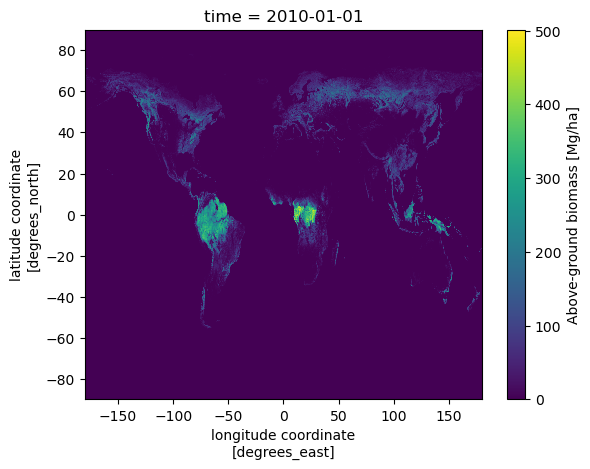

In [13]:
ds.agb.isel(time=0).plot()

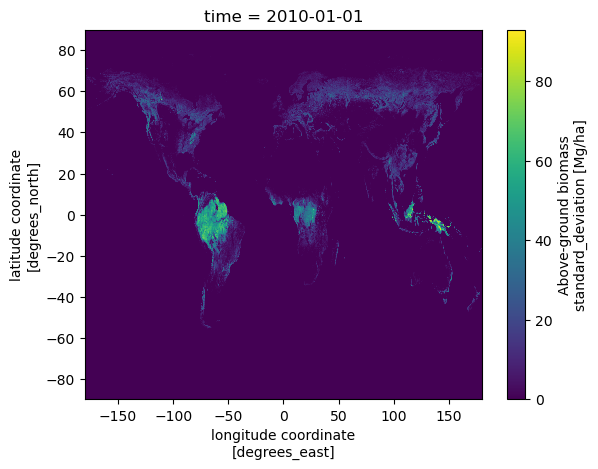

In [14]:
ds.agb_sd.isel(time=0).plot()